### 목표
- 간단한 데이터를 만들어서 RNN의 구조를 익혀보자!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 데이터셋 구축하기
- 문자 하나하나를 단위로 RNN을 사용해보자
- hello, apple, lobby, daddy, bobby

In [3]:
# 문제 데이터는 hell, appl, lobb, dadd, bobb
# 정답 데이터는 o, e, y, y, y

# timesteps는 4

#### 원핫인코딩으로 문자를 숫자로 변경
- 문제 + 정답 전체 데이터에서 등장하는 문자는 h, e, l, o, a, p, b, y, d 로 총
9개
- RNN 데이터의 구조 파악을 위해 직접 원핫인코딩을 해보자!

In [4]:
# 문제 데이터
X_train = np.array([[[1,0,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0,0], [0,0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0,0]],   # h,e,l,l
                    [[0,0,0,0,1,0,0,0,0], [0,0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0,0], [0,0,1,0,0,0,0,0,0]],   # a,p,p,l
                    [[0,0,1,0,0,0,0,0,0], [0,0,0,1,0,0,0,0,0], [0,0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0,0]],   # l,o,b,b
                    [[0,0,0,0,0,0,0,0,1], [0,0,0,0,1,0,0,0,0], [0,0,0,0,0,0,0,0,1], [0,0,0,0,0,0,0,0,1]],   # d,a,d,d
                    [[0,0,0,0,0,0,1,0,0], [0,0,0,1,0,0,0,0,0], [0,0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0,0]],   # b,o,b,b
                    ])

In [5]:
# 정답 데이터
y_train = np.array([[0,0,0,1,0,0,0,0,0],   # o
                    [0,1,0,0,0,0,0,0,0],   # e
                    [0,0,0,0,0,0,0,1,0],   # y
                    [0,0,0,0,0,0,0,1,0],   # y
                    [0,0,0,0,0,0,0,1,0]    # y
                    ])

In [6]:
X_train.shape, y_train.shape
# samples(샘플수), timesteps(순환횟수), features(특성수 = 원핫인코딩 된 컬럼 수)

((5, 4, 9), (5, 9))

#### 출력되는 값을 알파벳 전체로 하고 싶다면 26개로 원핫인코딩 하면 됨
- 현재는 RNN의 구조를 알아보기 위해 간단히 9개 문자로만 문제와 정답을 설정한 상태

### RNN 신경망 모델링

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [8]:
model = Sequential()

# 입력층 + SimpleRNN층 1개
# 8개의 뉴런을 가지고 각 뉴런이 4번씩 순환하며 각 순환마다 9개의 숫자가 들어감
model.add(SimpleRNN(8, input_shape=(4, 9)))

# 출력층
model.add(Dense(9, activation='softmax'))

model.summary()

# RNN은 가중치가 두 종류 있음(과거데이터의 가중치, 현재데이터의 가중치)
# 현재데이터의 가중치 -> 9(입력특성) * 8(RNN층 뉴런수) + 8(RNN층 뉴런수 = b값)
# RNN층의 각 뉴런들이 뽑아낸 결과는 다시 같은층의 모든 뉴런들에게 과거데이터로 들어가게 됨

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 144       
                                                                 
 dense (Dense)               (None, 9)                 81        
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['acc'])

In [10]:
h = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 6s 6s/step - loss: 2.4840 - acc: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 14ms/step - loss: 2.4700 - acc: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 14ms/step - loss: 2.4560 - acc: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 2.4421 - acc: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 12ms/step - loss: 2.4282 - acc: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 12ms/step - loss: 2.4144 - acc: 0.0000e+00
Epoch 7/200
1/1 [==============================] - 0s 11ms/step - loss: 2.4006 - acc: 0.0000e+00
Epoch 8/200
1/1 [==============================] - 0s 12ms/step - loss: 2.3868 - acc: 0.2000
Epoch 9/200
1/1 [==============================] - 0s 15ms/step - loss: 2.3731 - acc: 0.2000
Epoch 10/200
1/1 [==============================] - 0s 13ms/step - loss: 2.3595 - acc: 0.2000
Epoch 11/200
1/1 [=========================

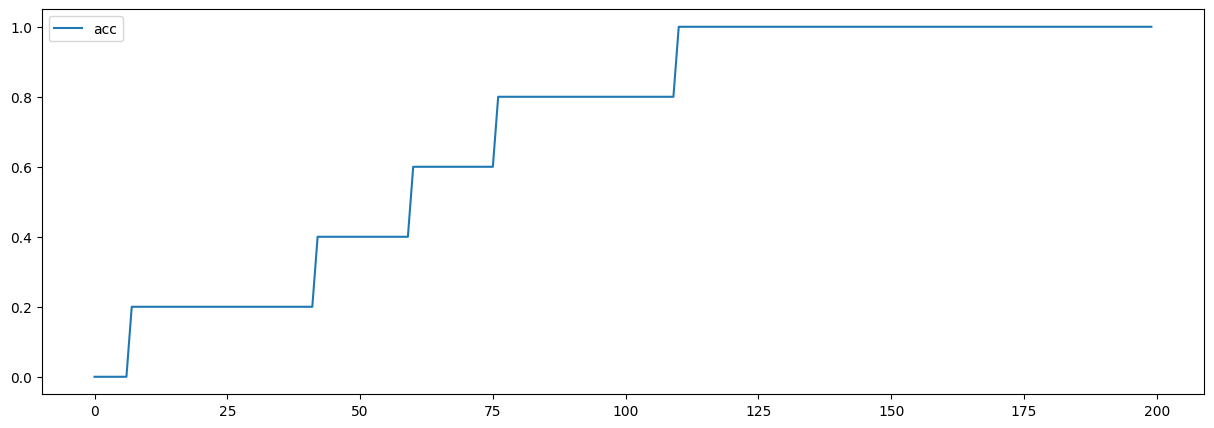

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(h.history['acc'], label='acc')
plt.legend()
plt.show()

In [14]:
# apple 을 넣어서 e가 잘 나오는지 확인해보자
input_word = np.array([[[0,0,0,0,1,0,0,0,0],
                        [0,0,0,0,0,1,0,0,0],
                          [0,0,0,0,0,1,0,0,0],
                          [0,0,1,0,0,0,0,0,0]]],)
input_word.shape

(1, 4, 9)

In [15]:
model.predict(input_word)
# h, e, l, o, a, p, b, y, d 순서대로 확률값 출력

1/1 [==============================] - 0s 317ms/step


array([[0.03237832, 0.59806705, 0.03751902, 0.13394225, 0.02784323,
        0.03626575, 0.04220811, 0.06366674, 0.02810952]], dtype=float32)